In [1]:
import math

import cv2
import gdal
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def quicksort(x, xi, xj, first, last):
    if first < last:
        pivot = first
        i = first
        j = last

        while i < j:
            while x[i] <= x[pivot] and i < last:
                i+=1
            while x[j] > x[pivot]:
                j-=1
            if i < j:
                temp = x[i]
                x[i] = x[j]
                x[j] = temp
                
                temp = xi[i]
                xi[i] = xi[j]
                xi[j] = temp
                
                temp = xj[i]
                xj[i] = xj[j]
                xj[j] = temp

        temp = x[pivot]
        x[pivot] = x[j]
        x[j] = temp

        temp = xi[pivot]
        xi[pivot] = xi[j]
        xi[j] = temp

        temp = xj[pivot]
        xj[pivot] = xj[j]
        xj[j] = temp

        quicksort(x, xi, xj, first, j-1)
        quicksort(x, xi, xj, j+1, last)

def expand_iter(image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, i, j):
    rows = image.shape[0]
    cols = image.shape[1]
    done = False
    while i < rows and not done:
        c1 = abs(image[i][j] - tgt)
        c2 = 360 - c1
        if c1 < c2:
            c = c1
        else:
            c = c2

        # if c > ot or image[i + j * rows] < 0 or seg_res[i + j * rows] > 0:
        if c > ot or image[i][j] < 0 or seg_res[i][j] > 0:
            done = True
            continue
        # seg_res[i + j * rows] = label_n
        seg_res[i][j] = label_n
        # out_m[i + j * rows] = 0
        out_m[i][j] = 0
    while
    
        
        
def expand(image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, i, j):
    rows = image.shape[0]
    cols = image.shape[1]

    # c1 = abs(image[i + j * rows] - tgt)
    c1 = abs(image[i][j] - tgt)
    c2 = 360 - c1
    if c1 < c2:
        c = c1
    else:
        c = c2
    
    # if c > ot or image[i + j * rows] < 0 or seg_res[i + j * rows] > 0:
    if c > ot or image[i][j] < 0 or seg_res[i][j] > 0:
        return
    
    # seg_res[i + j * rows] = label_n
    seg_res[i][j] = label_n
    # out_m[i + j * rows] = 0
    out_m[i][j] = 0
    if i < tb:
        tb = i
    if i > bb:
        bb = i
    if j < lb:
        lb = j
    if j > rb:
        rb = j
    
    if i + 1 < rows:
        expand(image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, i + 1, j)
    if j + 1 < rows:
        expand(image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, i, j + 1)
    if i - 1 >= 0:
        expand(image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, i - 1, j)
    if j - 1 >= 0:
        expand(image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, i, j - 1)
    return image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, i, j

def main(image, disThr, ortThr):
    # image is the edge orientation map
    rows = image.shape[0]
    cols = image.shape[1]

    dt = disThr
    ot = ortThr

    seg_res = np.zeros(shape=(rows, cols), dtype=float)

    out_m = np.ones(shape=(rows, cols), dtype=float)
    out_l = np.ones(shape=(rows * cols), dtype=int)
    out_li = np.ones(shape=(rows * cols), dtype=int)
    out_lj = np.ones(shape=(rows * cols), dtype=int)

    ws = dt * 2
    count = 0

    ii = 0
    while ii < rows:
        print("on row: " + str(ii))
        jj = 0
        while jj < cols:
            """
            if this value is above the magnitude threshold, then set
            tgti index (threshold greater than i) to ii, and set 
            tgtj index (threshold greater than k) to jj
            """
            # if image[ii + jj * rows] >= 0:
            if image[ii][jj] >= 0:
                tgti = ii
                tgtj = jj
                # top, left, bottom, right boundary?
                if tgti - ws > 0: # avoid indexing out of bounds of the top of the array
                    tb = tgti - ws
                else:
                    tb = 0

                if tgti + ws < rows - 1: # avoid indexing out of bounds of the bottom of the array
                    bb = tgti + ws
                else:
                    bb = rows - 1

                if tgtj - ws > 0: # avoid indexing out of bounds to the left of the array
                    lb = tgtj - ws
                else:
                    lb = 0

                if tgtj + ws < cols - 1: # avoid indexing out of bounds to the right of the array
                    rb = tgtj + ws
                else:
                    rb = cols - 1

                dstV = 0
                i = tb
                """
                Now iterate through a kernel which is a subset of the entire image
                the kernel is centered at pixel (ii, jj) and the kernel size when not
                near the boundary of the image is (32, 32). This size is defined by the 
                distance threshold (8) multiplied by 2 (ws = dt * 2).
                At each pixel in the kernel, measure its distance from the center,
                if this distance is less than the threshold, and the value of the pixel
                is greater than the magnitude threshold, and the pixel in kernel we are looking
                at is not the center of the kernel, 
                """
                while i <= bb:
                    j = lb
                    while j <= rb:
                        # the distance from the center of the kernel to pixel (i, j) in the kernel
                        d = math.sqrt((tgti-i)*(tgti-i)+(tgtj-j)*(tgtj-j)) 
                        # if d <= dt and image[i+j*rows] >= 0 and (i != tgti or j != tgtj):
                        if d <= dt and image[i][j] >= 0 and (i != tgti or j != tgtj):
                            # c1 = abs(image[tgti+tgtj*rows] - image[i+j*rows])
                            c1 = abs(image[tgti][tgtj] - image[i][j])
                            c2 = 360 - c1
                            if c1 < c2:
                                c = c1
                            else:
                                c = c2
                            if c < ot:
                                dstV += 1
                        j+=1
                    i+=1
                # out_m[ii+jj*rows] = dstV
                out_m[ii][jj] = dstV
                out_l[count] = dstV
                out_li[count] = ii
                out_lj[count] = jj
                count += 1
            jj+=1
        ii+=1
    
    # recursion depth issues with Python, using regular sort() for now...
    # quicksort(out_l, out_li, out_lj, 0, count - 1)
    out_l.sort()
    out_li.sort()
    out_lj.sort()

    label_n = 0
    k = count - 1
    while k >= 0:
        # if seg_res[out_li[k] + out_lj[k] * rows] == 0:
        if seg_res[out_li[k]][out_lj[k]] == 0:
            tgti = out_li[k]
            tgtj = out_lj[k]

            # if out_m[tgti + tgtj * rows] == 0:
            if out_m[tgti][tgtj] == 0:
                continue
            
            # tgt = image[tgti + tgtj * rows]
            tgt = image[tgti][tgtj]
            # out_m[tgti + tgtj * rows] = 0
            out_m[tgti][tgtj] = 0
            label_n+=1
            tb = tgti
            bb = tgti
            lb = tgtj
            rb = tgtj
            image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, tgti, tgtj = expand(image, seg_res, out_m, tgt, tb, bb, lb, rb, ot, label_n, tgti, tgtj)
        k-=1
    return seg_res

def yuans_lsr_feature(image_name, block, scale, mag):
    """
    Parameters:
    -----------
    image_name: str
    mag: int
        is 20 in the original matlab code
    
    Returns:
    
    
    """
    im = cv2.imread(image_name)
    # convert image to grayscale
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

    # calculate gradient orientation and magnitude
    im_mag, im_ang, dx, dy = __calc_mag_ang(im)
    mag_threshold = mag
    lsr_threshold = 20 # threshold for smallest line support region
    
    temp = im_ang #+ 180
    # tmp(edmim<magThreshold)=-1;
    # set every value in the edge orientation image to -1 if the edge magnitude is
    # less than the threshold.
    temp = np.where(im_mag < mag_threshold, -1, temp) 

    lsr_m = main(temp, 8, 30)
    
    # line_idx=unique(lsrM);
    line_idx = np.unique(lsr_m)
    
    # lsfarr = zeros(max(lsrM(:)),5);
    lsf_arr = np.zeros(np.max(lsr_m[:]), 5)
    
    count = 0

    l = 1
    for l in range(1, np.max(line_idx)):
        # idx=find(lsrM==l);
        idx = np.argwhere(lsr_m.ravel() == l) # returns an array of indices

        # eim = zeros(size(im));
        eim = np.zeros(shape=im.shape)

        # eim(idx) = 1;
        eim = np.where(lsr_m == l, 1, eim)

        # if (sum(eim(:)) <= lsrThreshold)
        if np.sum(eim) <= lsr_threshold: # ignore small line support region
            continue

        # ix_wi = dx(idx)
        # iy_wi = dy(idx)
        Ix_wi = dx.ravel()[idx] # extract elements in dx at index locations where lsr_m == l
        Iy_wi = dy.ravel()[idx]
        grd_wi = im_mag.ravel()[idx]
        
        # find major orientation
        ST = [[np.sum(Ix_wi**2), np.sum(Ix_wi*Iy_wi)],
              [np.sum(Ix_wi*Iy_wi), np.sum(Iy_wi**2)]]
        
        # V, D = eig(ST)
        # matlab returns returns diagonal matrix D of eigenvalues and matrix V whose columns are the corresponding right eigenvectors, so that A*V = V*D.
        D, V = np.linalg.eig(ST) # python's return of D is a 1D array, 
        D = np.diag(D) # make D on the diagonal to conform to matlab's procedure

        # if D(1,1)<D(2,2)
        #     lorn=atan(V(2,1)/V(1,1));
        # else
        #     lorn=atan(V(2,2)/V(1,2));
        # end 
        if D[0][0] < D[1][1]:
            # lorn=atan(V(2,1)/V(1,1));
            lorn = np.arctan(V[1][0]/V[0][0])
        else:
            # lorn=atan(V(2,2)/V(1,2));
            lorn = np.arctan(V[1][1]/V[0][1])

        # vote for r
        # [Ytmp,Xtmp]=ind2sub(size(im),idx);
        Ytmp, Xtmp = np.unravel_index(idx, im.shape)
        Ytmp+=1 # indices need += 1 for some indexing weirdness...
        Xtmp+=1
        # Raccm=round(Xtmp.*cos(lorn-pi/2)+Ytmp.*sin(lorn-pi/2));
        Raccm=np.round(Xtmp*math.cos(lorn-(math.pi/2))+Ytmp*math.sin(lorn-(math.pi/2)))
        rng=np.arange(Raccm.min(),Raccm.max()+1)
        accm=np.zeros(shape=(len(rng)))
        for k in range(len(idx)):
            rc = np.round(Xtmp[k]*math.cos(lorn-math.pi/2)+Ytmp[k]*math.sin(lorn-math.pi/2))
            accm[np.where(rng==rc)] = accm[np.where(rng==rc)] + grd_wi[k]

        mxid = np.argmax(accm)
        Xmx=max(Xtmp[np.where(Raccm==rng[mxid])])
        Xmn=min(Xtmp[np.where(Raccm==rng[mxid])])
        Ymx=max(Ytmp[np.where(Raccm==rng[mxid])])
        Ymn=min(Ytmp[np.where(Raccm==rng[mxid])])

        lmx = (Xmx+Xmn)/2
        lmy = (Ymx+Ymn)/2
        llen = math.sqrt((Xmx-Xmn)**2+(Ymx-Ymn)**2)
        lsfarr[count,0] = llen
        lsfarr[count,1] = lmx
        lsfarr[count,2] = lmy
        lsfarr[count,3] = lorn
        lcon=np.mean(grd_wi[(np.where(Raccm==rng[mxid]))])
        lsfarr[count,4] = lcon
        count+=1
        lsfarr = lsfarr[0:count,:]
    return lsfarr

def __calc_mag_ang_sobel(im):
    dx = cv2.Sobel(np.float32(im), cv2.CV_32F, 1, 0, ksize=7)
    dy = cv2.Sobel(np.float32(im), cv2.CV_32F, 0, 1, ksize=7)
    mag, ang = cv2.cartToPolar(dx, dy, angleInDegrees=1)
    return mag, ang, dx, dy

def __calc_mag_ang(im):
    # these kernels were obtained from the output of the matlab functions
    # they are the same kernels used in the original paper/code. The filtering 
    # in opencv might be implemented differently than the filtering in Matlab and so
    # results might be slightly different
    
    # f1=fspecial('gaussian',[7,7],1.2);
    # guassian_kernel = np.array([[0.0002, 0.0012, 0.0035, 0.0049, 0.0035, 0.0012, 0.0002],
    #                             [0.0012, 0.0069, 0.0196, 0.0277, 0.0196, 0.0069, 0.0012],
    #                             [0.0035, 0.0196, 0.0555, 0.0785, 0.0555, 0.0196, 0.0035],
    #                             [0.0049, 0.0277, 0.0785, 0.1111, 0.0785, 0.0277, 0.0049],
    #                             [0.0035, 0.0196, 0.0555, 0.0785, 0.0555, 0.0196, 0.0035],
    #                             [0.0012, 0.0069, 0.0196, 0.0277, 0.0196, 0.0069, 0.0012],
    #                             [0.0002, 0.0012, 0.0035, 0.0049, 0.0035, 0.0012, 0.0002]])
    # # hy = fspecial('prewitt');
    # prewitt_y = np.array([[1, 1, 1],
    #                       [0, 0, 0],
    #                       [-1, -1, -1]])

    # output of filtering the gaussian with a prewitt_y
    # hy1 = cv2.filter2d(f1, hy)
    hy1 = np.array([[-0.0081,-0.0277,-0.0542,-0.0669,-0.0542,-0.0277,-0.0081],
                    [-0.0216,-0.0736,-0.1440,-0.1777,-0.1440,-0.0736,-0.0216],
                    [-0.0245,-0.0834,-0.1632,-0.2013,-0.1632,-0.0834,-0.0245],
                    [0,0,0,0,0,0,0],
                    [ 0.0245,0.0834,0.1632,0.2013,0.1632,0.0834,0.0245],
                    [0.0216,0.0736,0.1440,0.1777,0.1440,0.0736,0.0216],
                    [0.0081,0.0277,0.0542,0.0669,0.0542,0.0277,0.0081]])
    # hx = hy1'
    hx = hy1.transpose()

    # dy = imfilter(im, hy1, 'replicate');
    # dx = imfilter(im, hx, 'replicate');
    dy = cv2.filter2D(np.float32(im), -1, hy1)
    dx = cv2.filter2D(np.float32(im), -1, hx)

    # eo = rad2deg(atan2(dy,(dx+1e-5)));
    # em = sqrt(dx.^2+dy.^2);
    # mag, ang = cv2.cartToPolar(dx, dy, angleInDegrees=1)

    # eo = rad2deg(atan2(dy,(dx+1e-5)));
    ang = np.rad2deg(np.arctan2(dy,(dx+1e-5)))
    ang+=180
    # em = sqrt(dx.^2+dy.^2);
    mag = np.sqrt(dx**2 + dy**2)
    return mag, ang, dx, dy

In [3]:
import random
test_im = "C:/Users/4ja/data/test.png"
a = yuans_lsr_feature(test_im, 50, 100, 50)

on row: 0
on row: 1
on row: 2
on row: 3
on row: 4
on row: 5
on row: 6
on row: 7
on row: 8
on row: 9
on row: 10
on row: 11
on row: 12
on row: 13
on row: 14
on row: 15
on row: 16
on row: 17
on row: 18
on row: 19
on row: 20
on row: 21
on row: 22
on row: 23
on row: 24
on row: 25
on row: 26
on row: 27
on row: 28
on row: 29
on row: 30
on row: 31
on row: 32
on row: 33
on row: 34
on row: 35
on row: 36
on row: 37
on row: 38
on row: 39
on row: 40
on row: 41
on row: 42
on row: 43
on row: 44
on row: 45
on row: 46
on row: 47
on row: 48
on row: 49
on row: 50
on row: 51
on row: 52
on row: 53
on row: 54
on row: 55
on row: 56
on row: 57
on row: 58
on row: 59
on row: 60
on row: 61
on row: 62
on row: 63
on row: 64
on row: 65
on row: 66
on row: 67
on row: 68
on row: 69
on row: 70
on row: 71
on row: 72
on row: 73
on row: 74
on row: 75
on row: 76
on row: 77
on row: 78
on row: 79
on row: 80
on row: 81
on row: 82
on row: 83
on row: 84
on row: 85
on row: 86
on row: 87
on row: 88
on row: 89
on row: 90
on row: 9

TypeError: 'NoneType' object is not iterable

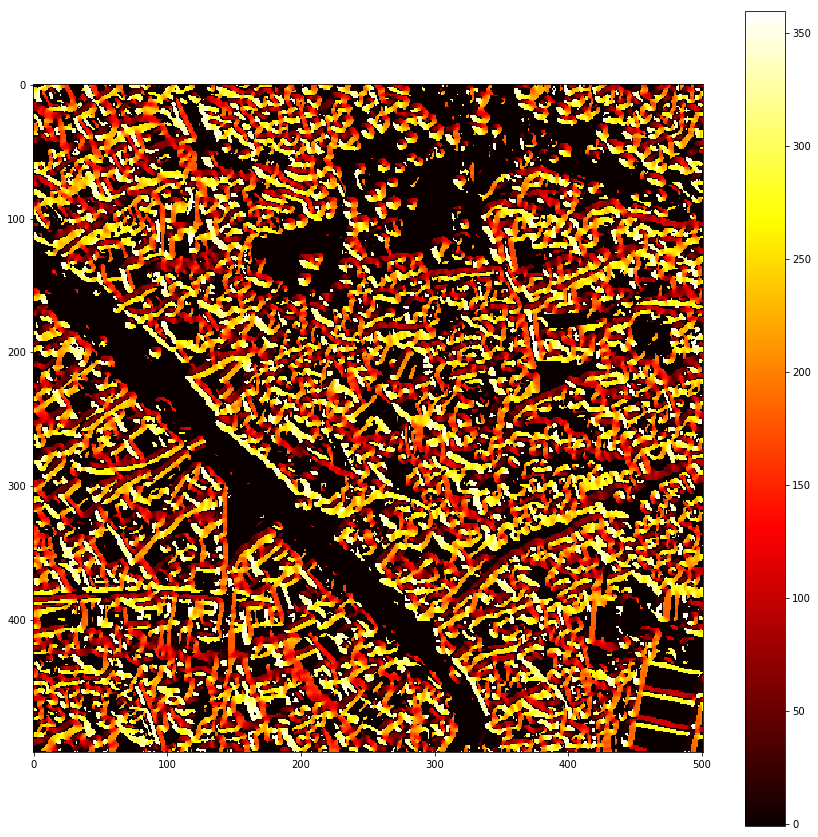

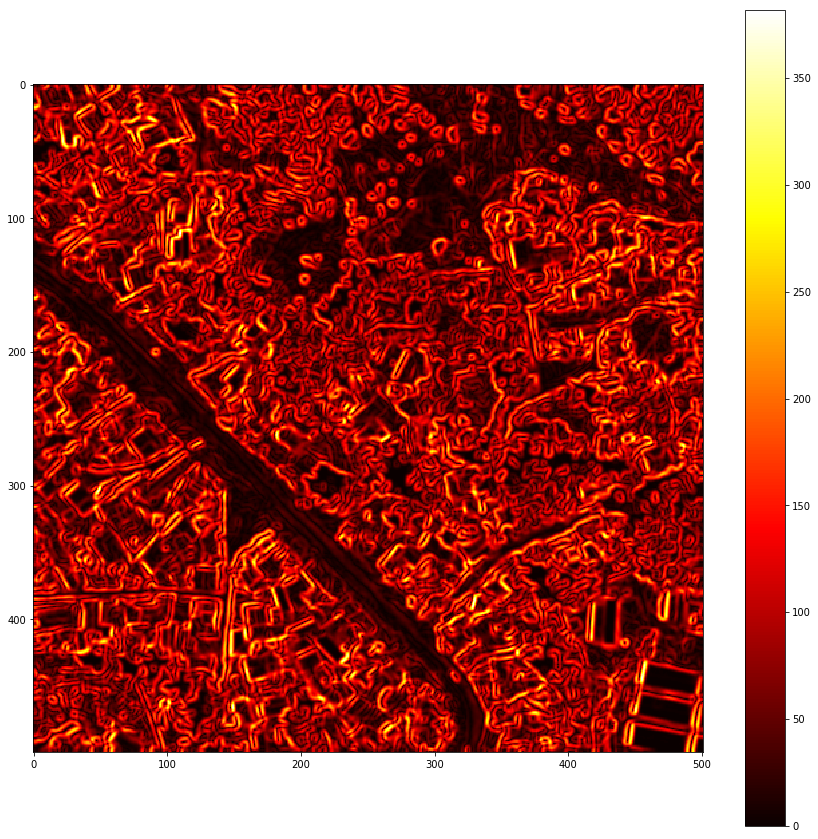

In [43]:
plt.figure(figsize=(15,15))
plt.imshow(a, cmap="hot")
plt.colorbar()
plt.show()

plt.figure(figsize=(15,15))
plt.imshow(m, cmap="hot")
plt.colorbar()
plt.show()